In [94]:
from selenium import webdriver

from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import matplotlib.pyplot as plt

In [97]:
driver = webdriver.Chrome(executable_path='C:\\Users\\Sumit\\.wdm\\drivers\\chromedriver\\win32\\95.0.4638.69\\chromedriver')
driver

<ipython-input-97-fcee1684294e>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='C:\\Users\\Sumit\\.wdm\\drivers\\chromedriver\\win32\\95.0.4638.69\\chromedriver')


<selenium.webdriver.chrome.webdriver.WebDriver (session="39a62f09821da9f4b2a816b199272c78")>

In [98]:
# open instagram page
driver.get("https://www.instagram.com/")

In [99]:
# 1. fill username password and login
username = driver.find_element(By.NAME,"username")
password = driver.find_element(By.NAME,"password")
submit = driver.find_element(By.XPATH,'//button[@type="submit"]')
username.send_keys("sumitdimshu@gmail.com")
password.send_keys("arichwal")
submit.click()

In [101]:
# click Not now to not save the password in popup window
driver.implicitly_wait(10)
not_now_btn = driver.find_elements(By.XPATH,'//button')
for i in not_now_btn:
    if i.text == 'Not Now':
        i.click()
        break

In [102]:
# 2. print search results of "food"
search_text = driver.find_element(By.XPATH,'//input[@aria-label="Search Input"]')
search_text.clear()
search_text.send_keys("food")
search_result = driver.find_elements(By.XPATH,"//div[@role='none']/a")
links = []
for i in search_result[:11]:
    href_attribute = i.get_attribute("href")
    if "tags/" in href_attribute:
        continue
    print(i.get_attribute("href").split("/")[3])
    links.append(i.get_attribute("href"))

karnatakafoodadda
73.food_promo55
dilsefoodie
bangalore_food_girl
food_lunatic
food_hippies95
food
foodie_incarnate
bangalorefoodiee
food.darzee


In [103]:
followers_dict = {}
for i in links:
    driver.get(i)
    driver.implicitly_wait(5)
    followers_e = driver.find_element(By.XPATH,'//a[contains(@href,"followers")]/span')
    followers = int(followers_e.get_attribute("title").replace(',',''))
    followers_dict[i] = followers
    print(followers)

14833
2692
948270
13556
125834
1789
153172
917196
57383
153534


In [104]:
# 1.1 Top 5 handles by number of followers 
followers_dict = {k: v for k, v in sorted(followers_dict.items(), key=lambda item: item[1],reverse=True)}
count = 0
for i in followers_dict.keys():
    if count>5:
        break
    print(i.split("/")[3],followers_dict[i])
    count+=1

dilsefoodie 948270
foodie_incarnate 917196
food.darzee 153534
food 153172
food_lunatic 125834
bangalorefoodiee 57383


In [105]:
followers_dict

{'https://www.instagram.com/dilsefoodie/': 948270,
 'https://www.instagram.com/foodie_incarnate/': 917196,
 'https://www.instagram.com/food.darzee/': 153534,
 'https://www.instagram.com/food/': 153172,
 'https://www.instagram.com/food_lunatic/': 125834,
 'https://www.instagram.com/bangalorefoodiee/': 57383,
 'https://www.instagram.com/karnatakafoodadda/': 14833,
 'https://www.instagram.com/bangalore_food_girl/': 13556,
 'https://www.instagram.com/73.food_promo55/': 2692,
 'https://www.instagram.com/food_hippies95/': 1789}

In [ ]:
# 1.2 Now Find the number of posts these handles have done in the previous 3 days
count=0
words_dict = {}
for i in followers_dict.keys():
    if count==5:
        break
    driver.get(i)
    words_post_link_dict = {}
    words_dict[i] = words_post_link_dict
    post_link_e = driver.find_elements(By.XPATH,"//a[contains(@href,'/p/')]")
    post_links = []
    for p in post_link_e[:10]:
        post_links.append(p.get_attribute("href"))
    for p in post_links:
        driver.get(p)
        content = driver.find_element(By.XPATH,"//div[@class='C4VMK']")
        words_post_link_dict[p] = content.text
    count+=1
words_dict

In [38]:
#2.1 scrape the content of 5 handle's first 10 posts
count=0
words_dict = {}
for i in followers_dict.keys():
    if count==5:
        break
    driver.get(i)
    words_post_link_dict = {}
    words_dict[i] = words_post_link_dict
    post_link_e = driver.find_elements(By.XPATH,"//a[contains(@href,'/p/')]")
    post_links = []
    for p in post_link_e[:10]:
        post_links.append(p.get_attribute("href"))
    for p in post_links:
        driver.get(p)
        content = driver.find_element(By.XPATH,"//div[@class='C4VMK']")
        words_post_link_dict[p] = content.text
    count+=1
words_dict

['https://www.instagram.com/p/CXbHDFWIcEL/', 'https://www.instagram.com/p/CXX2-b5KGak/', 'https://www.instagram.com/p/CXTtGBjoJhJ/', 'https://www.instagram.com/p/CXOPC1fI0xH/', 'https://www.instagram.com/p/CXLg1pWIvC-/', 'https://www.instagram.com/p/CXIU2uroIHd/', 'https://www.instagram.com/p/CXEPwgcvJqJ/', 'https://www.instagram.com/p/CXDeOD1ojbj/', 'https://www.instagram.com/p/CXA_8_0qqg9/', 'https://www.instagram.com/p/CW-NIgYIXtr/']
['https://www.instagram.com/p/CXYB1fNFcI6/', 'https://www.instagram.com/p/CXX1ubRBpGf/', 'https://www.instagram.com/p/CXVCIl5B6zz/', 'https://www.instagram.com/p/CXSxWYnhiB3/', 'https://www.instagram.com/p/CXSka5ht3o5/', 'https://www.instagram.com/p/CXP6TAys6eb/', 'https://www.instagram.com/p/CXNu7RQBIkf/', 'https://www.instagram.com/p/CXNTzYqlufY/', 'https://www.instagram.com/p/CXLERlqLTzj/', 'https://www.instagram.com/p/CXIfj3Jh-w3/']
['https://www.instagram.com/p/CXbCC4dlSmu/', 'https://www.instagram.com/p/CXaojIIlGWZ/', 'https://www.instagram.com/p/

{'https://www.instagram.com/dilsefoodie/': {'https://www.instagram.com/p/CXbHDFWIcEL/': 'dilsefoodie\nVerified\nLunch With Dad 😃\n#dilsefoodie\n17h',
  'https://www.instagram.com/p/CXX2-b5KGak/': 'dilsefoodie\nVerified\nPeeli Mirch Wale Chole Kulche At Nai Sadak, Chandni Chowk\n#dilsefoodie #dilsecouple\n2d',
  'https://www.instagram.com/p/CXTtGBjoJhJ/': 'dilsefoodie\nVerified\nMahender Ji Ke Dahi Bhalla Papdi Chaat At Nai Sadak, Chandni Chowk\n#dilsefoodie #dilsecouple\n3d',
  'https://www.instagram.com/p/CXOPC1fI0xH/': 'dilsefoodie\nVerified\nSamosa Lovers ❤️\n#dilsefoodie #dilsecouple\n5d',
  'https://www.instagram.com/p/CXLg1pWIvC-/': 'dilsefoodie\nVerified\nBhaiyo Bijli Se Kam Nahi Hai Giani ji Ka Rabri Faluda ☺️.\n#dilsefoodie #dilsecouple\n6d',
  'https://www.instagram.com/p/CXIU2uroIHd/': 'dilsefoodie\nVerified\nPatna Roll In Patna At Blue Moon\n#dilsefoodie #dilsecouple\n1w',
  'https://www.instagram.com/p/CXEPwgcvJqJ/': 'dilsefoodie\nVerified\nVeteran Journalist Vinod Dua Ji 

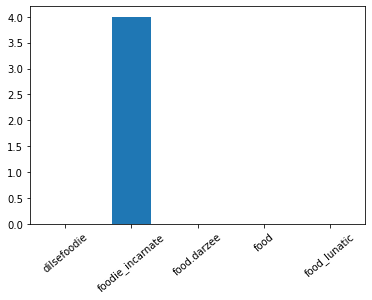

In [96]:
# 1.2 Now Find the number of posts these handles have done in the previous 3 days.
handles = []
posts_in_3days = []
for i in words_dict.keys():
    handles.append(i.split("/")[3])
    n_posts = 0
    for j in words_dict[i].values():
        content = j
        words = content.split("\n")
        posted_time = int(words[len(words)-1][:-1])
        if posted_time>3:
            break
#         print(j,content)
        n_posts+=1
    posts_in_3days.append(n_posts)
handles
posts_in_3days
plt.bar(handles,posts_in_3days,width=0.6)
plt.xticks(rotation=40)
plt.show()

In [43]:
# 2.3 prepare the list of words by frequencey
word_frequency_dict = {}
for i in words_dict.keys():
    for j in words_dict[i].values():
        content = j.replace('\n','')
        words = content.split(" ")
        for w in words:
            word_frequency_dict[w] = word_frequency_dict.get(w,0) + 1
word_frequency_dict

{'dilsefoodieVerifiedLunch': 1,
 'With': 1,
 'Dad': 1,
 '😃#dilsefoodie17h': 1,
 'dilsefoodieVerifiedPeeli': 1,
 'Mirch': 1,
 'Wale': 1,
 'Chole': 2,
 'Kulche': 1,
 'At': 3,
 'Nai': 2,
 'Sadak,': 2,
 'Chandni': 2,
 'Chowk#dilsefoodie': 2,
 '#dilsecouple2d': 1,
 'dilsefoodieVerifiedMahender': 1,
 'Ji': 2,
 'Ke': 1,
 'Dahi': 1,
 'Bhalla': 1,
 'Papdi': 1,
 'Chaat': 1,
 '#dilsecouple3d': 1,
 'dilsefoodieVerifiedSamosa': 1,
 'Lovers': 1,
 '❤️#dilsefoodie': 1,
 '#dilsecouple5d': 1,
 'dilsefoodieVerifiedBhaiyo': 1,
 'Bijli': 1,
 'Se': 1,
 'Kam': 1,
 'Nahi': 1,
 'Hai': 1,
 'Giani': 1,
 'ji': 1,
 'Ka': 3,
 'Rabri': 1,
 'Faluda': 1,
 '☺️.#dilsefoodie': 1,
 '#dilsecouple6d': 1,
 'dilsefoodieVerifiedPatna': 1,
 'Roll': 1,
 'In': 1,
 'Patna': 1,
 'Blue': 1,
 'Moon#dilsefoodie': 1,
 '#dilsecouple1w': 4,
 'dilsefoodieVerifiedVeteran': 1,
 'Journalist': 1,
 'Vinod': 1,
 'Dua': 1,
 'Passed': 1,
 'Away': 1,
 '😔.The': 1,
 'Man': 1,
 'Who': 1,
 'Actually': 1,
 'Started': 1,
 'Hosting': 1,
 'Food': 7,
 'Sho

In [52]:
# 2.3 Create a csv file with two columns : the word and its frequency
import csv
a_file = open("word_frequency.csv", "w",encoding="utf-8")
writer = csv.writer(a_file)
for key, value in word_frequency_dict.items():
    writer.writerow([key, value])
a_file.close()

In [60]:
# 2.4 Now, find the hashtags that were most popular among these bloggers
word_frequency_dict_s = {k: v for k, v in sorted(word_frequency_dict.items(), key=lambda item: item[1],reverse=True)}
count=0
hashtags = []
freqs = []
for key in word_frequency_dict_s.keys():
    if key.startswith("#"):
        if count==5:
            break
        hashtags.append(key)
        freqs.append(word_frequency_dict_s[key])
        print(key,word_frequency_dict_s[key])
        count+=1

#delhi 15
#delhifoodie 14
#reels 11
#foodie 11
#indianfoodbloggers 9


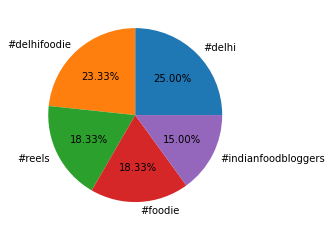

In [63]:
# 2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number 
#of times they were used by these bloggers in the scraped posts.
import matplotlib.pyplot as plt
plt.pie(freqs,labels = hashtags, autopct="%.2f%%")
plt.show()

In [115]:
# 3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier
count=0
handle_likes = {}
for i in followers_dict.keys():
    if count==5:
        break
    driver.get(i)
    handle_likes_post_link_dict = {}
    handle_likes[i] = handle_likes_post_link_dict
    post_link_e = driver.find_elements(By.XPATH,"//a[contains(@href,'/p/')]")
    post_links = []
    for p in post_link_e[:10]:
        post_links.append(p.get_attribute("href"))
    for p in post_links:
        driver.get(p)
        likes_elements = driver.find_elements(By.XPATH,"//a[contains(@href,'liked_by')]/span")
        likes = 0
        if len(likes_elements)>0:
            likes = int(likes_elements[0].text.replace(',',''))
        handle_likes_post_link_dict[p] = likes
    count+=1
handle_likes

{'https://www.instagram.com/dilsefoodie/': {'https://www.instagram.com/p/CXbHDFWIcEL/': 15325,
  'https://www.instagram.com/p/CXX2-b5KGak/': 12546,
  'https://www.instagram.com/p/CXTtGBjoJhJ/': 31426,
  'https://www.instagram.com/p/CXOPC1fI0xH/': 12177,
  'https://www.instagram.com/p/CXLg1pWIvC-/': 13138,
  'https://www.instagram.com/p/CXIU2uroIHd/': 39541,
  'https://www.instagram.com/p/CXEPwgcvJqJ/': 17692,
  'https://www.instagram.com/p/CXDeOD1ojbj/': 6715,
  'https://www.instagram.com/p/CXA_8_0qqg9/': 6122,
  'https://www.instagram.com/p/CW-NIgYIXtr/': 26493},
 'https://www.instagram.com/foodie_incarnate/': {'https://www.instagram.com/p/CXdBu_ihRLA/': 0,
  'https://www.instagram.com/p/CXYB1fNFcI6/': 32005,
  'https://www.instagram.com/p/CXX1ubRBpGf/': 25139,
  'https://www.instagram.com/p/CXVCIl5B6zz/': 0,
  'https://www.instagram.com/p/CXSxWYnhiB3/': 216566,
  'https://www.instagram.com/p/CXSka5ht3o5/': 20035,
  'https://www.instagram.com/p/CXP6TAys6eb/': 0,
  'https://www.instagr

In [116]:
# 3.2 Calculate the average likes for a handle
handle_avg_likes = {}
for i in handle_likes.keys():
    sum_likes = 0
    for like_key in handle_likes[i].keys():
        sum_likes+=handle_likes[i][like_key]
    avg_likes = sum_likes/10
    handle_avg_likes[i] = avg_likes
handle_avg_likes

{'https://www.instagram.com/dilsefoodie/': 18117.5,
 'https://www.instagram.com/foodie_incarnate/': 39567.3,
 'https://www.instagram.com/food.darzee/': 694.8,
 'https://www.instagram.com/food/': 571.7,
 'https://www.instagram.com/food_lunatic/': 7704.9}

In [122]:
# 3.3 Divide the average likes obtained from the number of followers 
# of the handle to get the average followers:like ratio of each handle
followers_dict
followers_to_likes_ratio_dict = {}
handles_for_ratio = []
like_ratio = []
for i in handle_avg_likes.keys():
    ratio = followers_dict[i] / handle_avg_likes[i]
    followers_to_likes_ratio_dict[i] = ratio
    handles_for_ratio.append(i.split("/")[3])
    like_ratio.append(ratio)
followers_to_likes_ratio_dict
handles_for_ratio
like_ratio

[52.34000275976266,
 23.180656754441166,
 220.97582037996548,
 267.92373622529294,
 16.331685031603268]

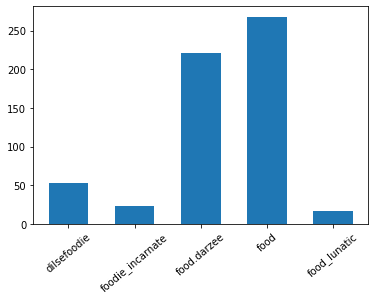

In [126]:
# 3.4 Create a bar graphto depict the above obtained information
plt.bar(handles_for_ratio,like_ratio,width=0.6)
plt.xticks(rotation=40)
plt.show()